## DIABETES PREDICTION USING SIMPLE VECTOR MACHINE SVM

### Import Necessary Libraries/ Dependencies

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, classification_report, confusion_matrix
from sklearn import svm  
from sklearn.preprocessing import StandardScaler

### Data Collection and Analysis

In [2]:
# Import the dataset
diabetes_dataset = pd.read_csv('diabetes.csv')
diabetes_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
diabetes_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
diabetes_dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### Handling Invalid Zero Values

In the dataset, the minimum values for **Glucose**, **BloodPressure**, **SkinThickness**, **Insulin**, and **BMI** are recorded as **0**.  
However, these measurements cannot realistically be zero in humans. For example:

- **Glucose** levels cannot be 0 mg/dL, as it would indicate death.  
- **BloodPressure** cannot be 0 mmHg in a living person.  
- **SkinThickness** and **BMI** cannot be 0 since they represent body measurements.  
- **Insulin** levels are never truly 0 because the pancreas always produces some amount.

These zero entries are therefore treated as **missing or invalid values**, likely due to **data entry or measurement errors**, and will be **imputed using the mean or median** as appropriate for each feature.


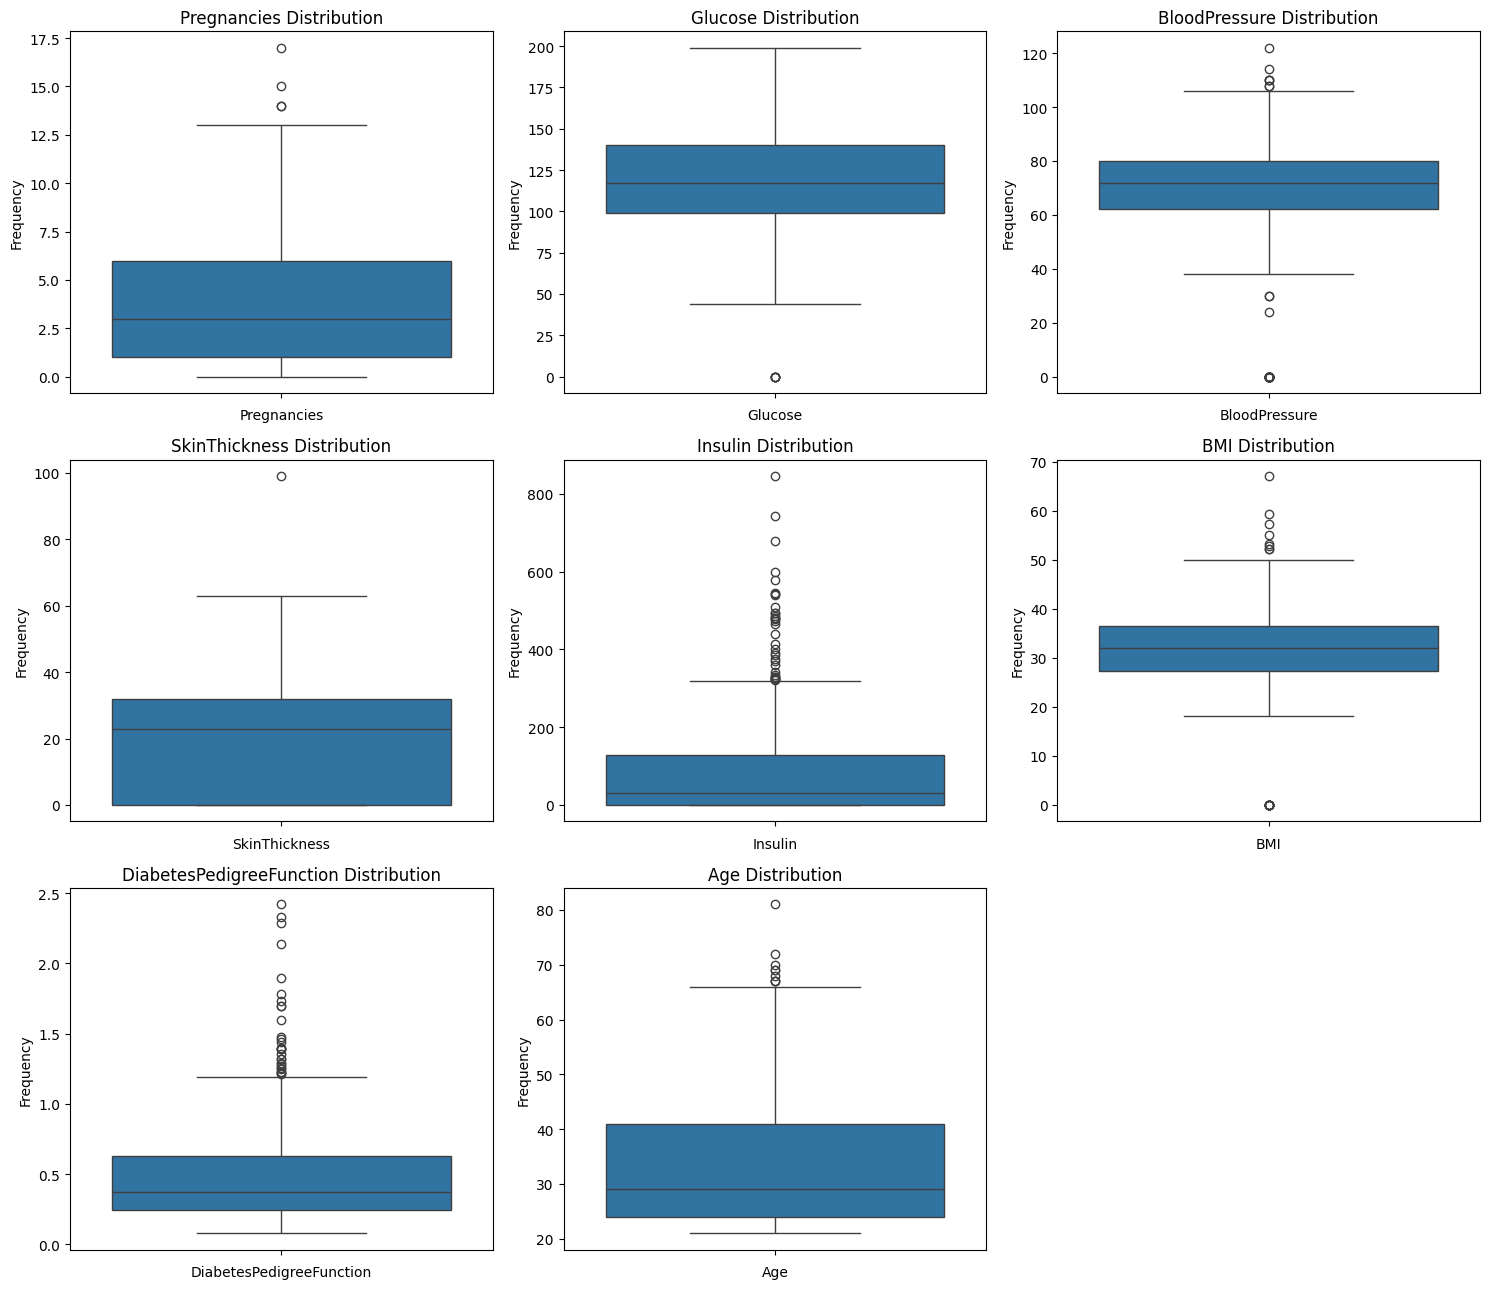

In [5]:
# Checking the distribution 

plt.figure(figsize=(15, 13))

for i, feature in enumerate(diabetes_dataset.drop(columns= "Outcome"), 1):
    plt.subplot(3, 3, i)
    sns.boxplot(diabetes_dataset[feature])
    plt.title(f'{feature} Distribution', fontsize=12)
    plt.xlabel(feature)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

### Imputation Strategy

Based on the boxplot distributions of the features, it was observed that some variables are fairly symmetrical while others are noticeably skewed. Therefore, the method of imputation was chosen according to the shape of each feature’s distribution.

For **Glucose**, the data appears approximately symmetrical with no significant skewness, so the **mean** was used for imputation.  
Similarly, **BloodPressure** shows a near-normal distribution, making the **mean** an appropriate measure to replace missing or zero values.  

In contrast, **SkinThickness** is right-skewed with several high outliers; hence the **median** was selected, as it is more robust against skewed data.  
**Insulin** also exhibits a strong right-skew with many extreme values, so the **median** was used for imputation to reduce the influence of outliers.  

Lastly, **BMI** appears roughly symmetrical; therefore, the **mean** was chosen as the imputation method.  

In summary, mean imputation was applied to `Glucose`, `BloodPressure`, and `BMI`, while median imputation was applied to `SkinThickness` and `Insulin`.


In [6]:
# Impute the wrong zero values with mean/median
mean_impute = ["Glucose", "BloodPressure", "BMI"]
median_impute = ["Insulin", "SkinThickness"]

for feature in mean_impute:
    mean_value = diabetes_dataset[feature].mean()
    diabetes_dataset[feature] = diabetes_dataset[feature].replace(0, mean_value)

for feature in median_impute:
    median_value = diabetes_dataset[feature].median()
    diabetes_dataset[feature] = diabetes_dataset[feature].replace(0, median_value)

diabetes_dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,27.334635,94.652344,32.450805,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.229014,105.547598,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,23.000000,30.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,31.250000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
print(diabetes_dataset['Outcome'].value_counts())

diabetes_dataset.groupby('Outcome').mean()

Outcome
0    500
1    268
Name: count, dtype: int64


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,110.705367,70.810008,26.058000,83.188000,30.880066,0.429734,31.190000
1,4.865672,142.159661,74.950326,29.716418,116.041045,35.381288,0.550500,37.067164


### 0 -> Non-Diabetic
### 1 -> Diabetic

In [8]:
# Splitting the features and labels
x = diabetes_dataset.drop(columns = 'Outcome', axis=1)
y = diabetes_dataset['Outcome']

### Data Preprocessing

In [9]:
# Data standardization
# scaler = StandardScaler()

# standardized_data = scaler.fit_transform(x)
# standardized_data

In [10]:
# x = standardized_data
# y = diabetes_dataset['Outcome']

### Split the data into training and testing data

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, stratify=y, random_state=42)

In [12]:
print(x.shape, x_train.shape, x_test.shape)
print(y.shape, y_train.shape, y_test.shape)

(768, 8) (537, 8) (231, 8)
(768,) (537,) (231,)


### Training the model

In [13]:
# train the model using svm
clf  = svm.SVC(kernel='rbf', class_weight='balanced')
clf.fit(x_train, y_train)

#predict 
model1 = clf.predict(x_test)

#Check for performance
print("Confusion Matrix: ")
print(confusion_matrix(model1, y_test))
print("Accuracy: ", accuracy_score(model1, y_test))
print("Recall: ", recall_score(model1, y_test))
print("Precision", precision_score(model1, y_test))
print("Classification Report:")
print(classification_report(model1, y_test))

Confusion Matrix: 
[[113  26]
 [ 37  55]]
Accuracy:  0.7272727272727273
Recall:  0.5978260869565217
Precision 0.6790123456790124
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.81      0.78       139
           1       0.68      0.60      0.64        92

    accuracy                           0.73       231
   macro avg       0.72      0.71      0.71       231
weighted avg       0.72      0.73      0.72       231



### **Interpretation**

- The model achieves an **accuracy of 77%**, which is quite solid for the Diabetes dataset.  
- The **recall (0.65)** indicates that about **65% of actual diabetic cases** were correctly identified.  
- The **precision (0.75)** shows that **75% of the predicted diabetic cases** were indeed diabetic.  
- The F1-score for diabetics (0.70) shows a good balance between recall and precision.  
- Performance across both classes is fairly balanced, with slightly better detection for the non-diabetic class.


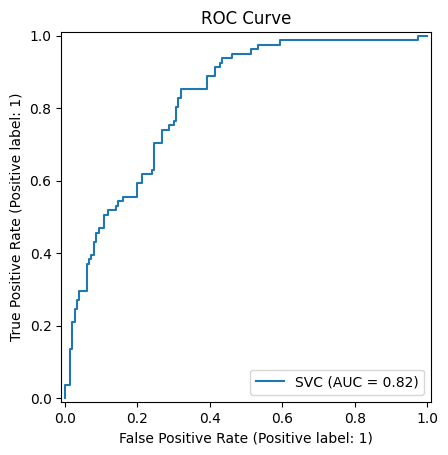

In [14]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_estimator(clf, x_test, y_test)
plt.title("ROC Curve")
plt.show()


### ROC (Receiver Operating Characteristic) Curve 

The **ROC curve** evaluates how well the model distinguishes between diabetic and non-diabetic cases.
It plots the True Positive Rate (Recall) against the False Positive Rate at various thresholds.

The model achieved an **AUC score** of **0.83**, indicating good discrimination ability, meaning it can effectively separate positive (diabetic) and negative (non-diabetic) cases.
A curve closer to the top-left corner represents better performance.

### **Summary**
Overall, the model demonstrates **strong and balanced performance**, effectively identifying diabetic patients while maintaining a reasonable false-positive rate.  
This model is suitable for **screening-level prediction**, though further improvement in recall (e.g., via threshold adjustment or ensemble methods) could make it more sensitive for medical use.

# _______________________________________________________________________________________________

### Making a predictive system


In [15]:
input_data = (5,166,72,19,175,25.8,0.587,51)
# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)
# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
# standardize the input data
# std_data = scaler.transform(input_data_reshaped)
prediction = clf.predict(input_data_reshaped)
print(prediction)

[1]


C:\Users\user\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


## Saving the trained model

In [21]:
import pickle

In [22]:
filename = "Diabetes_trainedModel.sav"
pickle.dump(clf, open(filename, 'wb'))

## Loading the saved model

In [19]:
Loaded_model = pickle.load(open(filename, 'rb'))

In [26]:
# Apply the loaded model to make predictions

input_data = (5,166,72,19,175,25.8,0.587,51)
input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
# standardize the input data
# std_data = scaler.transform(input_data_reshaped)
prediction = Loaded_model.predict(input_data_reshaped)

print(prediction)
if prediction[0] == 0:
    print("The person is not diabetic")
else:
    print("The person is diabetic")



[1]
The person is diabetic


C:\Users\user\AppData\Roaming\Python\Python312\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
